In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("../../../Data/placement_or_not_or_not.csv")
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


# Finding Outlier

In [6]:
df['z-score'] =( df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()
df

,cgpa,placement_exam_marks,placed,z-score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


In [8]:
df[(df['z-score'] > 3) | (df['z-score'] < -3) ]

,cgpa,placement_exam_marks,placed,z-score
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [10]:
# change in shape
print("Before:",df.shape)
print("After:",df[(df['z-score'] <= 3) & (df['z-score'] >= -3) ].shape)

Before: (1000, 4)
After: (995, 4)


# way-1: Trim outlier

In [12]:
df_trim = df[(df['z-score'] <= 3) & (df['z-score'] >= -3) ]
df_trim

,cgpa,placement_exam_marks,placed,z-score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


# way-2: Cap outlier

In [13]:
highest_allowed_cgpa = df['cgpa'].mean() + (3*df['cgpa'].std())
lowest_allowed_cgpa = df['cgpa'].mean() - (3*df['cgpa'].std())
lowest_allowed_cgpa, highest_allowed_cgpa

(np.float64(5.113546374602832), np.float64(8.808933625397168))

In [14]:
df_cap = df.copy()
df_cap['cgpa'] = np.where(
    df['z-score'] > 3,
    highest_allowed_cgpa,
    np.where(
        df['cgpa'] < lowest_allowed_cgpa,
        lowest_allowed_cgpa,
        df['cgpa']
    )
)
df_cap

,cgpa,placement_exam_marks,placed,z-score
0,7.190000,26.0,1,0.371425
1,7.460000,38.0,1,0.809810
2,7.540000,40.0,1,0.939701
3,6.420000,8.0,1,-0.878782
4,7.230000,17.0,0,0.436371
...,...,...,...,...
995,8.808934,44.0,1,3.099150
996,8.808934,65.0,1,3.505062
997,5.113546,34.0,0,-3.362960
998,8.620000,46.0,1,2.693239


C:\Users\Jehan\AppData\Local\Temp\ipykernel_11256\3185787646.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\Jehan\AppData\Local\Temp\ipykernel_11256\3185787646.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_trim['cgpa'])
C:\Users\Jehan\AppData\Local\Temp\ipykern

Text(0.5, 1.0, 'After Capping')

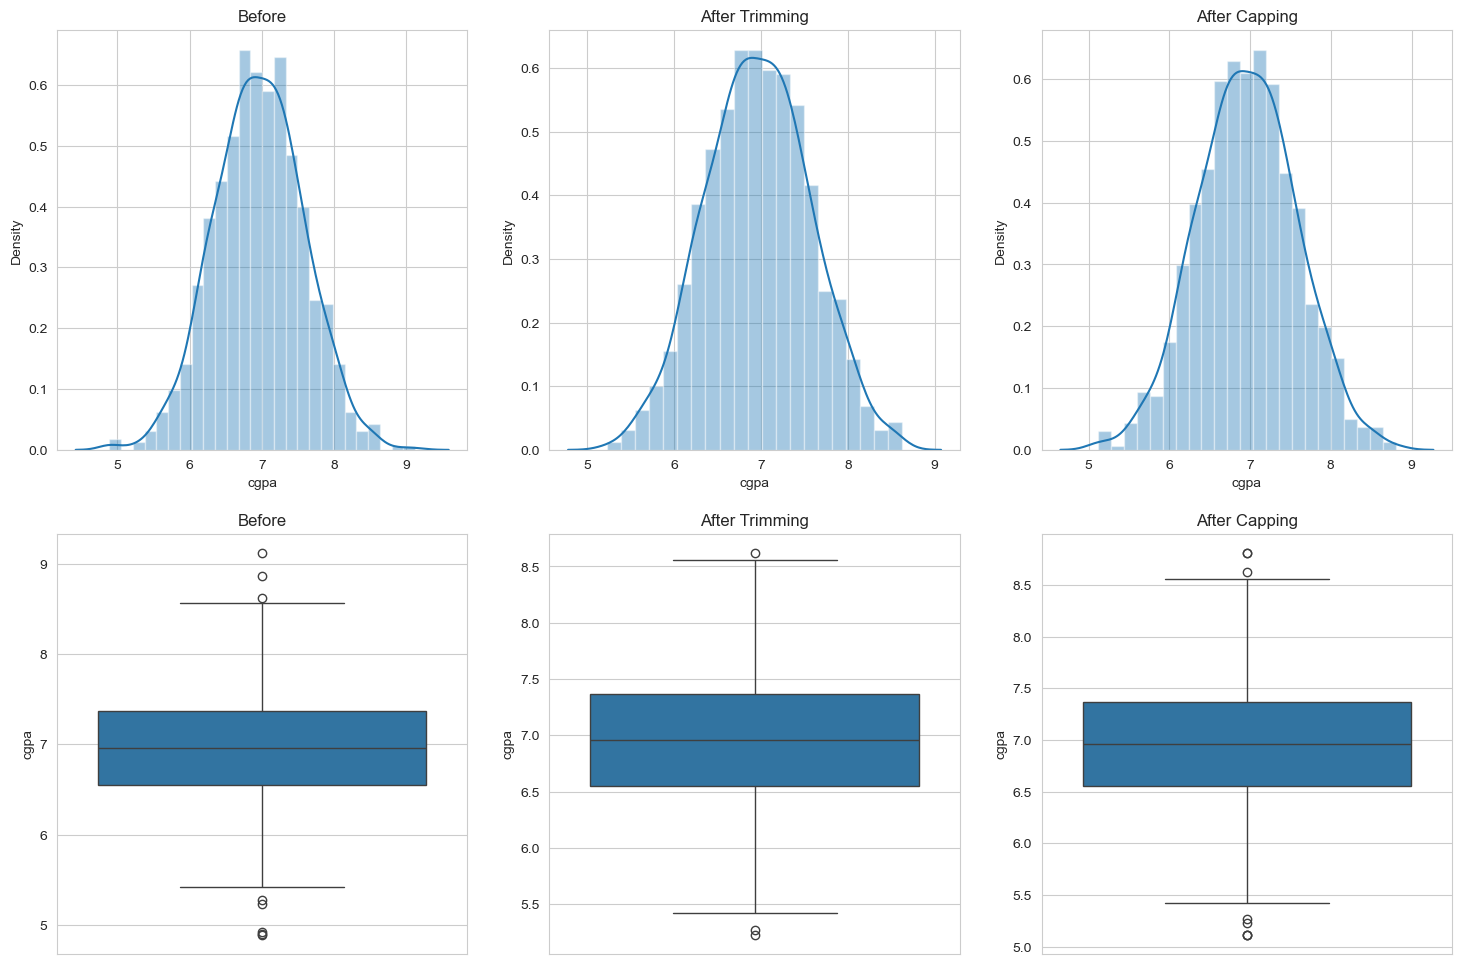

In [16]:
plt.figure(figsize=(18,12))

plt.subplot(231)
sns.distplot(df['cgpa'])
plt.title("Before")

plt.subplot(232)
sns.distplot(df_trim['cgpa'])
plt.title("After Trimming")

plt.subplot(233)
sns.distplot(df_cap['cgpa'])
plt.title("After Capping")

plt.subplot(234)
sns.boxplot(df['cgpa'])
plt.title("Before")

plt.subplot(235)
sns.boxplot(df_trim['cgpa'])
plt.title("After Trimming")

plt.subplot(236)
sns.boxplot(df_cap['cgpa'])
plt.title("After Capping")

